# Author: Ingrid Bena Ria

# Task 6: Prediction using Decision Tree Algorithm

January, 29th 2022 

In this task, we would create the decision tree classifier and visualize it graphically and predict the right class accordingly.

In [48]:
# IMPORTING THE REQUIRED LIBRARIES

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
pwd

'C:\\Users\\ingrid.ria\\Downloads\\Jupyter Notebook'

In [12]:
variable = pd.read_excel (r"C:\Users\ingrid.ria\Downloads\Jupyter Notebook\ing.xlsx")

In [16]:
df = pd.read_excel (r"C:\Users\ingrid.ria\Downloads\Jupyter Notebook\ing.xlsx")

In [15]:
df.head(20)

,Id,Sepal Length Cm,Sepal Width Cm,Petal Length Cm,Petal Width Cm,Species
0,1,51,35,14,2,Iris-setosa
1,2,49,30,14,2,Iris-setosa
2,3,47,32,13,2,Iris-setosa
3,4,46,31,15,2,Iris-setosa
4,5,50,36,14,2,Iris-setosa
5,6,54,39,17,4,Iris-setosa
6,7,46,34,14,3,Iris-setosa
7,8,50,34,15,2,Iris-setosa
8,9,44,29,14,2,Iris-setosa
9,10,49,31,15,1,Iris-setosa


In [18]:
df.describe()

,Id,Sepal Length Cm,Sepal Width Cm,Petal Length Cm,Petal Width Cm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,58.433333,30.540000,37.586667,11.986667
std,43.445368,8.280661,4.335943,17.644204,7.631607
min,1.000000,43.000000,20.000000,10.000000,1.000000
25%,38.250000,51.000000,28.000000,16.000000,3.000000
50%,75.500000,58.000000,30.000000,43.500000,13.000000
75%,112.750000,64.000000,33.000000,51.000000,18.000000
max,150.000000,79.000000,44.000000,69.000000,25.000000


In [35]:
#Data points count value for each class labels
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Visualizing the Ing Data 

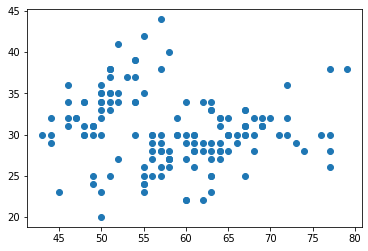

In [43]:
#Visualizing the dataset features to find pattern to solve our task
plt.scatter(df['Sepal Length Cm'],df['Sepal Width Cm'])
plt.show()

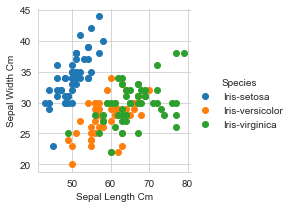

In [49]:
#Using Seaborn lib to visualized 2 features based on target variable.

sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'Species') \
   .map(plt.scatter, 'Sepal Length Cm','Sepal Width Cm') \
   .add_legend()

plt.show()

By looking the Scatter plot we can say that all the bluepoints (Iris-setosa) are separated perfectly as compare to the orange (Iris-versicolor) or green (Iris-virginica) points for features (Sepal Length Cm, Sepal Width Cm).

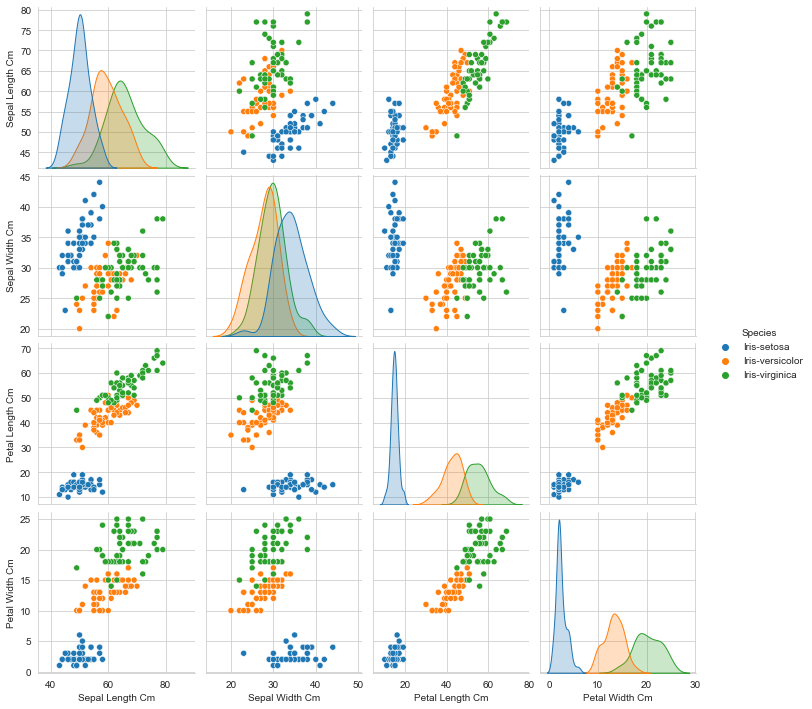

In [52]:
#Pair plot gives the relationship b/w all the features distribution with each other

sns.pairplot(df.drop(['Id'],axis=1), hue='Species')
plt.show()

# Exploratory the Data

In [54]:
#Using the given data
df['Sepal_diff'] = df['Sepal Length Cm']-df['Sepal Width Cm']
df['petal_diff'] = df['Petal Length Cm']-df['Petal Width Cm']
df

,Id,Sepal Length Cm,Sepal Width Cm,Petal Length Cm,Petal Width Cm,Species,Sepal_diff,petal_diff
0,1,51,35,14,2,Iris-setosa,16,12
1,2,49,30,14,2,Iris-setosa,19,12
2,3,47,32,13,2,Iris-setosa,15,11
3,4,46,31,15,2,Iris-setosa,15,13
4,5,50,36,14,2,Iris-setosa,14,12
...,...,...,...,...,...,...,...,...
145,146,67,30,52,23,Iris-virginica,37,29
146,147,63,25,50,19,Iris-virginica,38,31
147,148,65,30,52,20,Iris-virginica,35,32
148,149,62,34,54,23,Iris-virginica,28,31


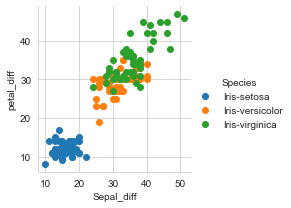

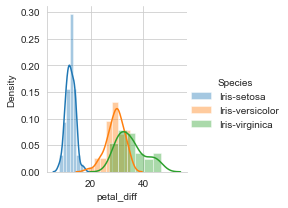

In [55]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Species')\
   .map(plt.scatter,'Sepal_diff','petal_diff')\
   .add_legend()
plt.show()    


sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Species')\
   .map(sns.distplot,'petal_diff')\
   .add_legend()
plt.show()    

In [57]:
df['Sepal_petal_len_diff'] = df['Sepal Length Cm']-df['Petal Length Cm']
df['Sepal_petal_width_diff'] = df['Sepal Width Cm']-df['Petal Width Cm']
df

,Id,Sepal Length Cm,Sepal Width Cm,Petal Length Cm,Petal Width Cm,Species,Sepal_diff,petal_diff,Sepal_petal_len_diff,Sepal_petal_width_diff
0,1,51,35,14,2,Iris-setosa,16,12,37,33
1,2,49,30,14,2,Iris-setosa,19,12,35,28
2,3,47,32,13,2,Iris-setosa,15,11,34,30
3,4,46,31,15,2,Iris-setosa,15,13,31,29
4,5,50,36,14,2,Iris-setosa,14,12,36,34
...,...,...,...,...,...,...,...,...,...,...
145,146,67,30,52,23,Iris-virginica,37,29,15,7
146,147,63,25,50,19,Iris-virginica,38,31,13,6
147,148,65,30,52,20,Iris-virginica,35,32,13,10
148,149,62,34,54,23,Iris-virginica,28,31,8,11


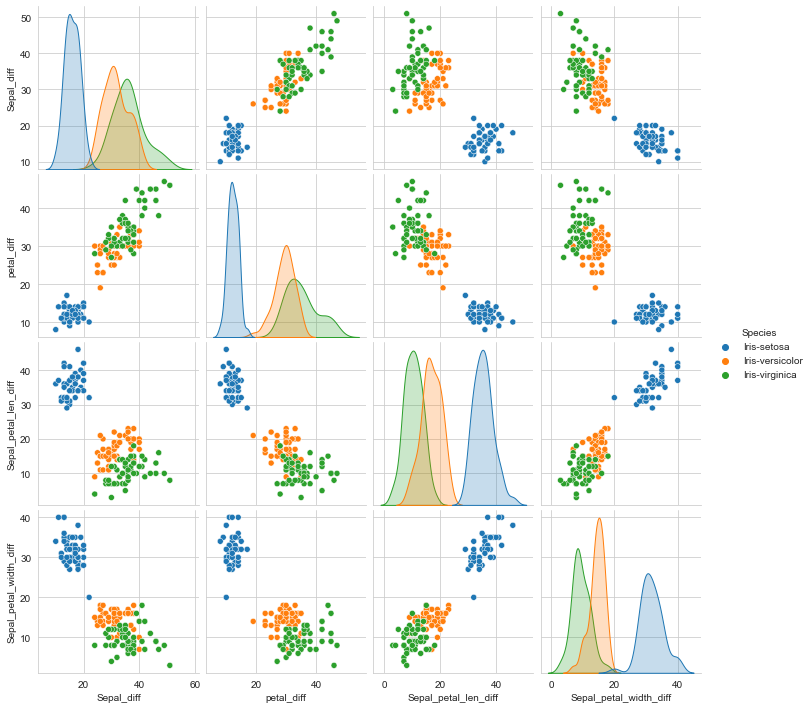

In [64]:
sns.pairplot(df[['Species', 'Sepal_diff', 'petal_diff', 'Sepal_petal_len_diff',\
       'Sepal_petal_width_diff']], hue ='Species')
plt.show()

In [66]:
df['Sepal_petal_len_wid_diff'] = df['Sepal Length Cm']-df['Petal Width Cm']
df['Sepal_petal_wid_len_diff'] = df['Sepal Width Cm']-df['Petal Length Cm']
df

,Id,Sepal Length Cm,Sepal Width Cm,Petal Length Cm,Petal Width Cm,Species,Sepal_diff,petal_diff,Sepal_petal_len_diff,Sepal_petal_width_diff,Sepal_petal_len_wid_diff,Sepal_petal_wid_len_diff
0,1,51,35,14,2,Iris-setosa,16,12,37,33,49,21
1,2,49,30,14,2,Iris-setosa,19,12,35,28,47,16
2,3,47,32,13,2,Iris-setosa,15,11,34,30,45,19
3,4,46,31,15,2,Iris-setosa,15,13,31,29,44,16
4,5,50,36,14,2,Iris-setosa,14,12,36,34,48,22
...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,67,30,52,23,Iris-virginica,37,29,15,7,44,-22
146,147,63,25,50,19,Iris-virginica,38,31,13,6,44,-25
147,148,65,30,52,20,Iris-virginica,35,32,13,10,45,-22
148,149,62,34,54,23,Iris-virginica,28,31,8,11,39,-20


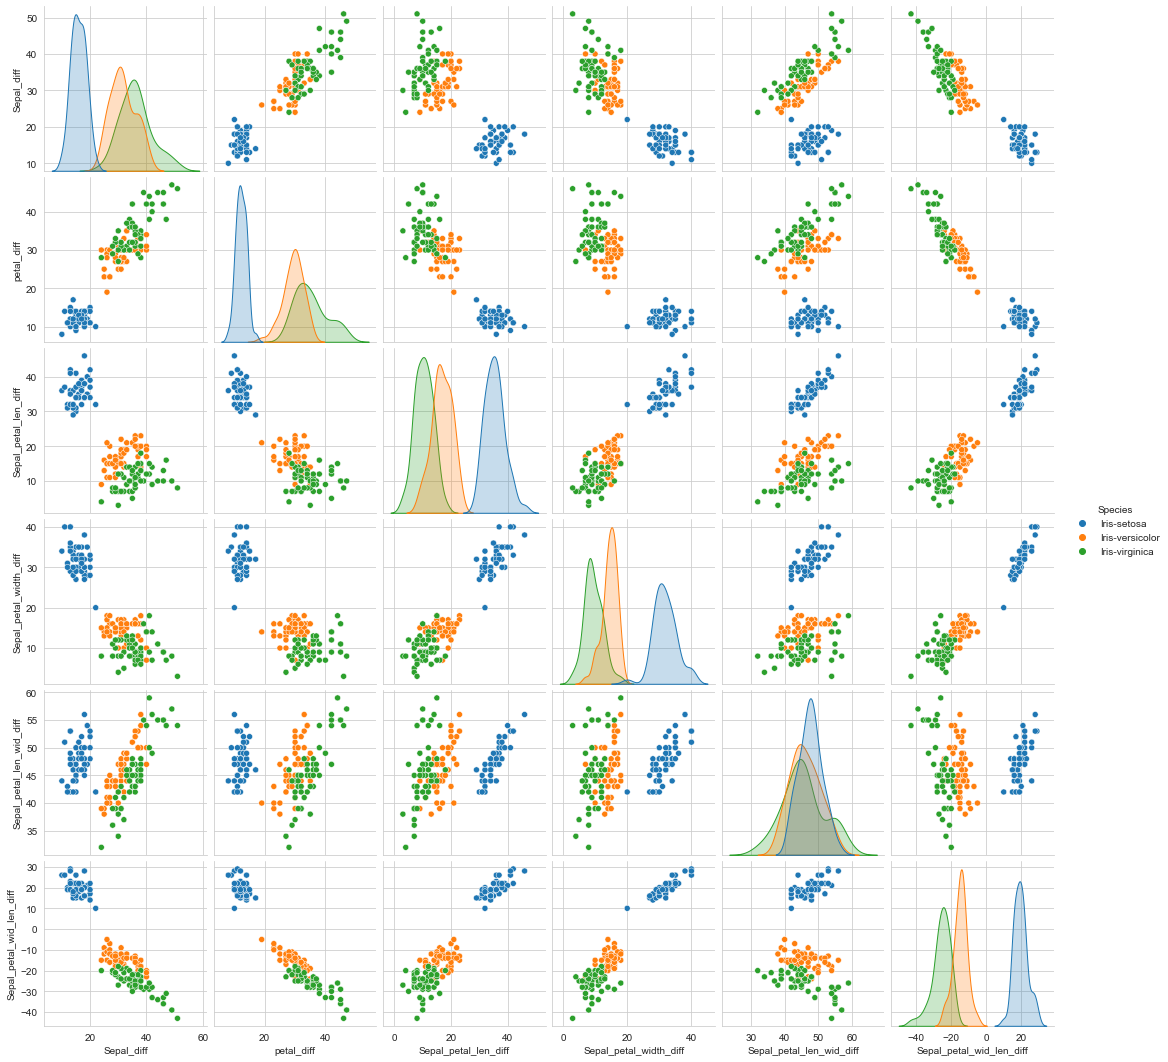

In [70]:
# Finding relationship between the new feature based on class labels.

sns.pairplot(df[['Species', 'Sepal_diff', 'petal_diff', 'Sepal_petal_len_diff',\
       'Sepal_petal_width_diff', 'Sepal_petal_len_wid_diff',\
       'Sepal_petal_wid_len_diff']], hue='Species')
plt.show()

From the plot we can see that it has some overlapped between the Iris-Versicolor and Iris-virginica.

In [71]:
#Droping Id column as it is of no use in classifing the class labels

df.drop(['Id'],axis=1,inplace=True)

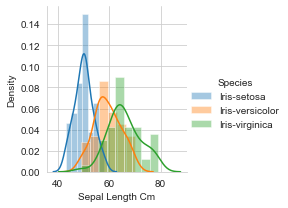

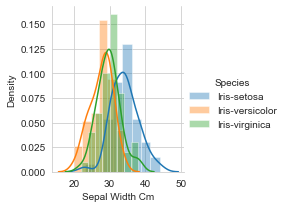

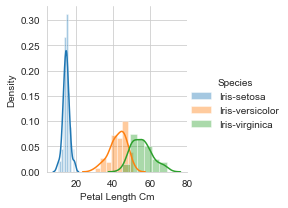

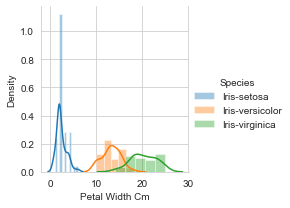

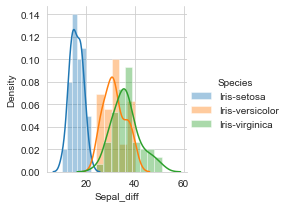

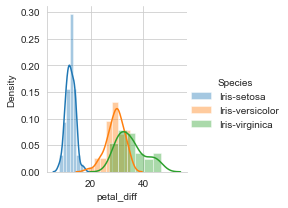

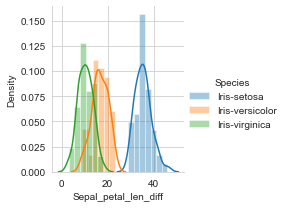

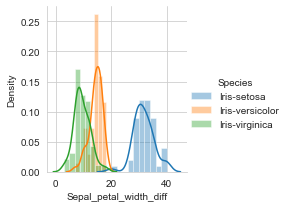

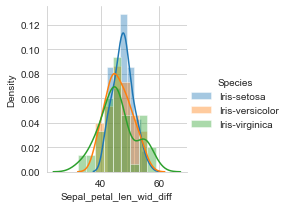

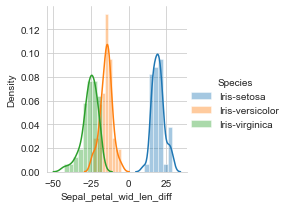

In [73]:
#Exploring distribution plot for all features

for i in df.columns:
    if i == 'Species':
        continue
    sns.set_style('whitegrid')
    sns.FacetGrid(df,hue='Species')\
    .map(sns.distplot,i)\
    .add_legend()
    plt.show()

# Classification Model

In [76]:
#Imporing few library for create Decision tree classifier and visualizing the tree structure'''

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

[Text(213.05454545454546, 199.32, 'X[5] <= 19.0\ngini = 0.665\nsamples = 94\nvalue = [30, 30, 34]'),
 Text(182.61818181818182, 163.07999999999998, 'X[4] <= -19.0\ngini = 0.498\nsamples = 64\nvalue = [0, 30, 34]'),
 Text(121.74545454545455, 126.83999999999999, 'X[3] <= 17.5\ngini = 0.153\nsamples = 36\nvalue = [0, 3, 33]'),
 Text(91.30909090909091, 90.6, 'X[2] <= 50.5\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(60.872727272727275, 54.359999999999985, 'X[5] <= 9.0\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(30.436363636363637, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(91.30909090909091, 18.119999999999976, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(121.74545454545455, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(152.1818181818182, 90.6, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]'),
 Text(243.4909090909091, 126.83999999999999, 'X[3] <= 16.5\ngini = 0.069\nsamples = 28\nvalue = [0, 27, 1]'),
 Text(

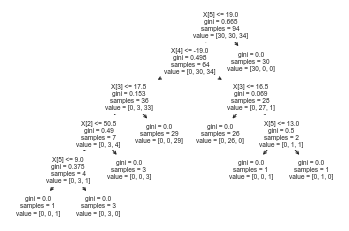

In [81]:
X = df[['Sepal Length Cm', 'Sepal Width Cm','Petal Length Cm', 'Petal Width Cm','Sepal_petal_wid_len_diff','Sepal_petal_width_diff']]
y = df['Species']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=42)
Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)
Iris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_clf.fit(Xt, Yt)
tree.plot_tree(Iris_clf)

[Text(133.92000000000002, 203.85, 'X[3] <= 8.0\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(100.44000000000001, 176.67000000000002, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(167.40000000000003, 176.67000000000002, 'X[4] <= -19.0\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(100.44000000000001, 149.49, 'X[3] <= 17.5\ngini = 0.18\nsamples = 40\nvalue = [0, 4, 36]'),
 Text(66.96000000000001, 122.31, 'X[4] <= -26.0\ngini = 0.494\nsamples = 9\nvalue = [0, 4, 5]'),
 Text(33.480000000000004, 95.13, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(100.44000000000001, 95.13, 'X[5] <= 9.0\ngini = 0.444\nsamples = 6\nvalue = [0, 4, 2]'),
 Text(66.96000000000001, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(133.92000000000002, 67.94999999999999, 'X[1] <= 27.5\ngini = 0.32\nsamples = 5\nvalue = [0, 4, 1]'),
 Text(100.44000000000001, 40.77000000000001, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(167.40000000000003, 40.7700

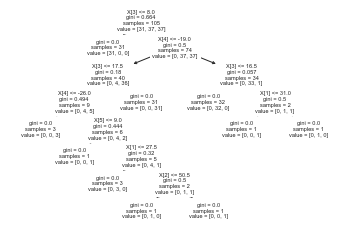

In [82]:
'''Training model on Actual train data... '''
Iris_Fclf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_Fclf.fit(Xtrain, Ytrain)

#Visualize tree structure..
tree.plot_tree(Iris_Fclf)